# Mat Foundation Analysis and Design using SAP2000

__Gitamondoc Gopaoco Structural Engineering__

__Engr. Michael James C. Quidilla, CE__

_Updated: November 09, 2017_

## Assumptions for the Model

- Allowable Bearing Capacity = $200kPa$

- Allowable deflection of soil = $10mm$

- Spring stiffness coefficient = $200kPa$ / $10mm$ = $200000kN/m^3$

- Thickness of foundation = $1.50m$

- Keep in mind that the results of SAP2000 from the table if extracted via Resultant forces are in $kN/m$ or $kN.m/m$. SAP2000 divided by a __tributary width of 1m__. The result must then be multiplied by the __tributary area__ of the resultant force or moment.

- The Earthquake was neglected on the analysis due the fact that column load combination are governed by Dead plus Live. The governing shearwall combination includes EQX and EQY. But the analysis is focused on the positive and negative steel reinforcements per column on top of the mat.

- The stresses were extracted from SAP2000 via tables and plotted here for better visualization.


The verification of modeling of the mat foundation was modeled initially with a isolated footing and compared it with its RCD counter part. The results summary are as follows:

- the Ultimate bearing capacity $(Pu/Ag)$ distributed along the isolated footing of the SAP2000 model were exactly the same as the RCD's Ultimate bearing capacity. The difference in the bearing capacity is that the SAP2000 model's spring reaction (idealized from the soil pressure reaction) are more distributed in a circular manner than the RCD's approach which is distributed evenly. 

- The Moment and punching shear of the SAP2000 model are nearly identical compared to the RCD's approach. The computation of the moment is at the critical section (at the face of the column for moment and column dimension C + d (depth of footing) distance from the center of the column for critical punching area for shear)

# Exploration of the Data

## Summary Statistics of the Mat Foundation Ultimate Bearing Capacity

In [3]:
import pandas as pd
reactions = pd.read_excel('MatFoundationReactions-1500mm.xlsx')
reactions.describe()

,Joint,GlobalX (mm),GlobalY (mm),Dead_(kN),EQX_(kN)
count,888.000000,888.000000,888.000000,888.000000,888.000000
mean,463.959459,9551.041667,15132.162162,144.930963,35.655324
std,257.418111,5909.219702,8938.546894,46.321112,35.734753
min,1.000000,0.000000,0.000000,8.828000,-29.239000
25%,242.750000,4475.000000,7843.330000,121.683000,6.940750
50%,464.500000,9425.000000,14773.330000,155.777500,31.280000
75%,686.250000,14490.625000,22750.000000,177.992750,61.144000
max,908.000000,19500.000000,30700.000000,216.582000,135.156000


## Plotting the Heat map of the Ultimate Beariing Capacity of Mat Foundation Based of Dead + Live

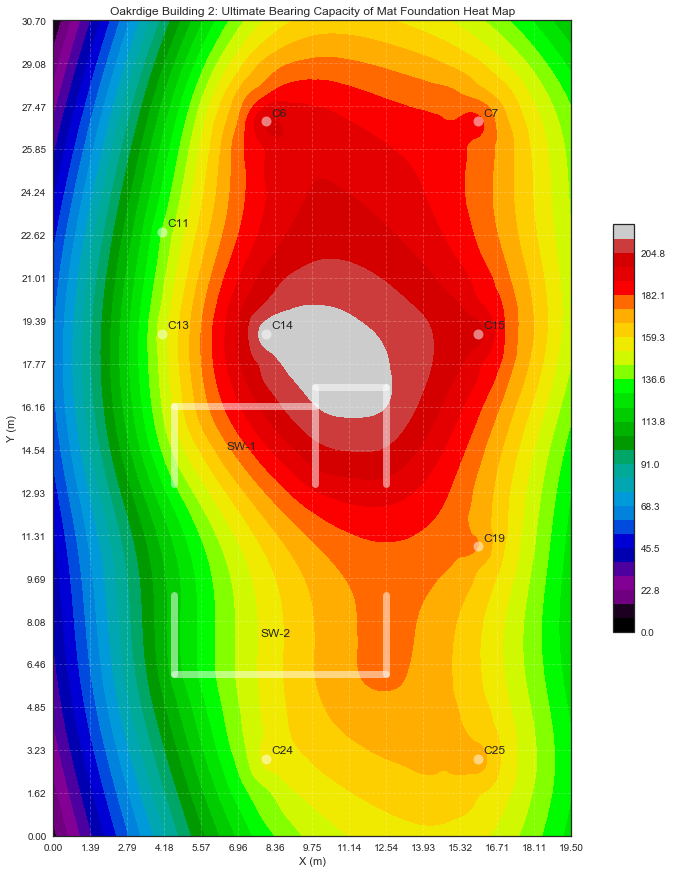

In [4]:
plot_contour_map(file_name='MatFoundationReactions-1500mm.xlsx',
                stress_name = 'Dead_(kN)',
                level = [0, 220, 30],
                color = 'nipy_spectral',
                title = 'Oakrdige Building 2: Ultimate Bearing Capacity of Mat Foundation Heat Map',
                fsize = [15,15])

## Summary Statistics of the Mat Foundation Shell Forces

In [6]:
shell_forces = pd.read_excel('ShellForcesCLEAN-1500mm.xlsx')
shell_forces.describe()

,Joint,GlobalX (mm),GlobalY (mm),F11,F22,F12,FMax,FMin,FAngle,FVM,M11,M22,M12,MMax,MMin,MAngle,V13,V23,VMax,VAngle
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,463.959459,9551.041667,15132.162162,23.028826,-9.630043,0.846994,43.554174,-30.155535,0.323122,72.071122,628.123909,252.299246,2.110660,739.293697,141.129456,-3.471924,-8.397617,-6.917992,422.129671,-1.421440
std,257.418111,5909.219702,8938.546894,59.642665,71.201937,31.384247,55.449521,88.068414,42.668738,113.279964,538.808755,502.471305,158.074327,539.163111,442.631580,37.261246,363.124529,357.849489,481.578875,95.332948
min,1.000000,0.000000,0.000000,-331.550000,-610.381667,-157.791667,-33.100000,-839.435000,-89.402000,0.010560,-81.734350,-628.994300,-591.538675,-28.802850,-629.168975,-89.499000,-2327.440000,-2369.987500,5.740000,-175.304500
25%,242.750000,4475.000000,7843.330000,-1.010000,-4.736875,-5.561250,7.500625,-21.881875,-27.880562,11.867500,226.233469,-52.960000,-78.107894,389.348038,-101.041681,-21.153500,-155.916250,-145.062500,170.406875,-85.078500
50%,464.500000,9425.000000,14773.330000,5.628750,0.581250,0.210000,24.952500,-6.831250,0.536850,32.021250,565.267787,188.591850,-7.379187,648.303488,65.744512,-1.442375,-26.580000,0.235000,286.978750,-0.512125
75%,686.250000,14490.625000,22750.000000,37.054375,12.420000,6.774375,56.845625,-1.806875,28.881375,75.271875,873.664975,464.040735,88.606700,970.014762,318.922388,14.985750,155.240625,139.566250,473.906250,73.495437
max,908.000000,19500.000000,30700.000000,305.281667,84.335000,158.472500,310.683333,45.007500,88.856250,889.335000,4982.597425,4151.461700,541.670875,5015.867975,4118.191100,89.356000,2189.277500,2075.260000,4393.025000,178.232000


## Plotting the Contour Map of  Axial Factored Dead + Live load of Mat Foundation

## Design of Steel along X-Direction

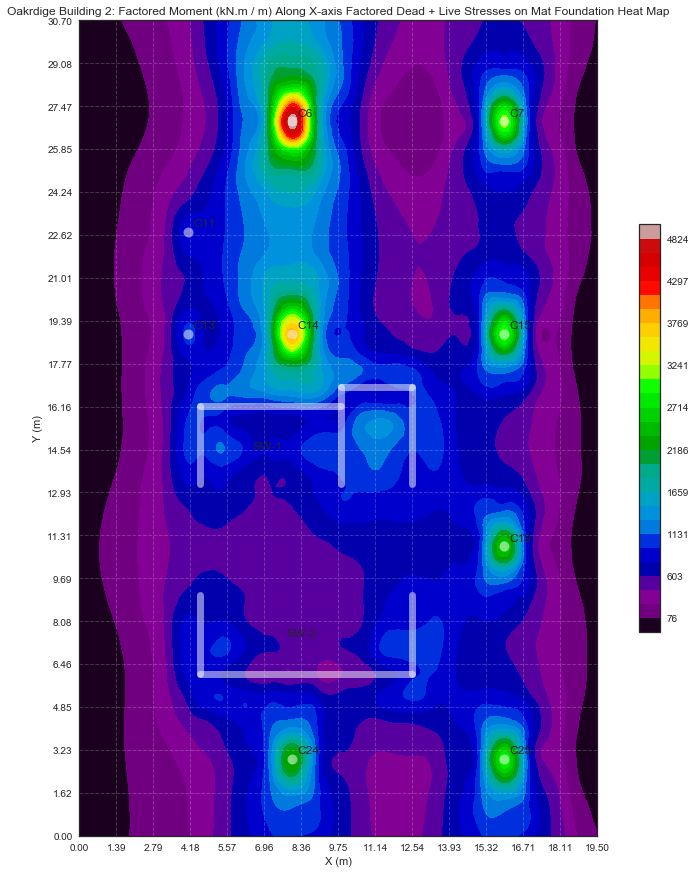

In [7]:
plot_contour_map(file_name='ShellForcesCLEAN-1500mm.xlsx',
                stress_name = 'M11',
                level = [-100, 5000, 30],
                color = 'nipy_spectral',
                title = 'Oakrdige Building 2: Factored Moment (kN.m / m) Along X-axis Factored Dead + Live Stresses on Mat Foundation Heat Map',
                fsize = [15,15])

__Maximum Bottom bar reinforcement for C6 and C14:__

In [8]:
Moment = 1.62*1.39*5000
design_steel_rein(Mu = Moment, b = 3*1620, d = 1500, db = 28, layers = 1, cover = 75)

p: 0.003130069464583729
pmin:  0.0034
4/3*p:  0.0042
usep:  0.0034
Moment:  11259.00, no of bars: 38 using  28 mm rebar 1 layers
spacing:  135 mm


__Maximum Bottom bar reinforcement for C24, C25, C19, C15 and C7:__

In [9]:
Moment = 1.62*1.39*3000
design_steel_rein(Mu = Moment, b = 5200, d = 1500, db = 28, layers = 1, cover = 75)

p: 0.0017380376821601482
pmin:  0.0034
4/3*p:  0.0023
usep:  0.0023
Moment:  6755.40, no of bars: 28 using  28 mm rebar 1 layers
spacing:  158 mm


__Maximum Bottom bar reinforcement for C11 and C13:__

In [10]:
Moment = 1.62*1.39*800
design_steel_rein(Mu = Moment, b = 2*1620, d = 1500, db = 28, layers = 1, cover = 75)

p: 0.0007386522711734751
pmin:  0.0034
4/3*p:  0.0010
usep:  0.0020
Moment:  1801.44, no of bars: 15 using  28 mm rebar 1 layers
spacing:  99 mm


## Design of Steel along Y-Direction

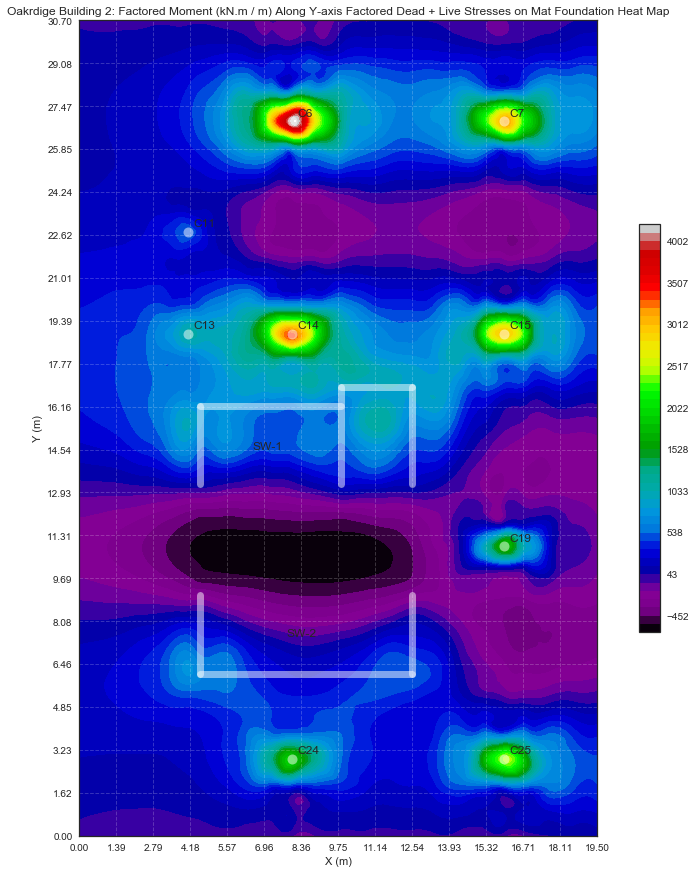

In [11]:
plot_contour_map(file_name='ShellForcesCLEAN-1500mm.xlsx',
                stress_name = 'M22',
                level = [-650, 4200, 50],
                color = 'nipy_spectral',
                title = 'Oakrdige Building 2: Factored Moment (kN.m / m) Along Y-axis Factored Dead + Live Stresses on Mat Foundation Heat Map',
                fsize = [15,15])

__Maximum Bottom bar reinforcement for C6 and C14__

In [12]:
Moment = 1.32*1.62*3500
design_steel_rein(Mu = Moment, b = 4*1390, d = 1500, db = 28, layers = 1, cover = 75)

p: 0.0018017250286220137
pmin:  0.0034
4/3*p:  0.0024
usep:  0.0024
Moment:  7484.40, no of bars: 31 using  28 mm rebar 1 layers
spacing:  168 mm


__Maximum Bottom bar reinforcement for C19, C24, and C25__

In [13]:
Moment = 3*1.32*1.62*2500
design_steel_rein(Mu = Moment, b = 4*1390, d = 1500, db = 28, layers = 1, cover = 75)

p: 0.003919320516904343
pmin:  0.0034
4/3*p:  0.0052
usep:  0.0039
Moment:  16038.00, no of bars: 50 using  28 mm rebar 1 layers
spacing:  148 mm


__Maximum Bottom bar reinforcement for C7 and C15__

In [14]:
Moment = 1.32*3*1.62*3000
design_steel_rein(Mu = Moment, b = 4*1390, d = 1500, db = 28, layers = 1, cover = 75)

p: 0.004730638398353554
pmin:  0.0034
4/3*p:  0.0063
usep:  0.0047
Moment:  19245.60, no of bars: 61 using  28 mm rebar 1 layers
spacing:  137 mm


__Maximum Top bar reinforcement for Mat Foundation both ways__

In [15]:
Moment = 1.32*3*600*1.62
design_steel_rein(Mu = Moment, b = 4*1390, d = 1500, db = 28, layers = 1, cover = 75)

p: 0.000920885805596799
pmin:  0.0034
4/3*p:  0.0012
usep:  0.0020
Moment:  3849.12, no of bars: 26 using  28 mm rebar 1 layers
spacing:  174 mm


## Check for Punching Shear 

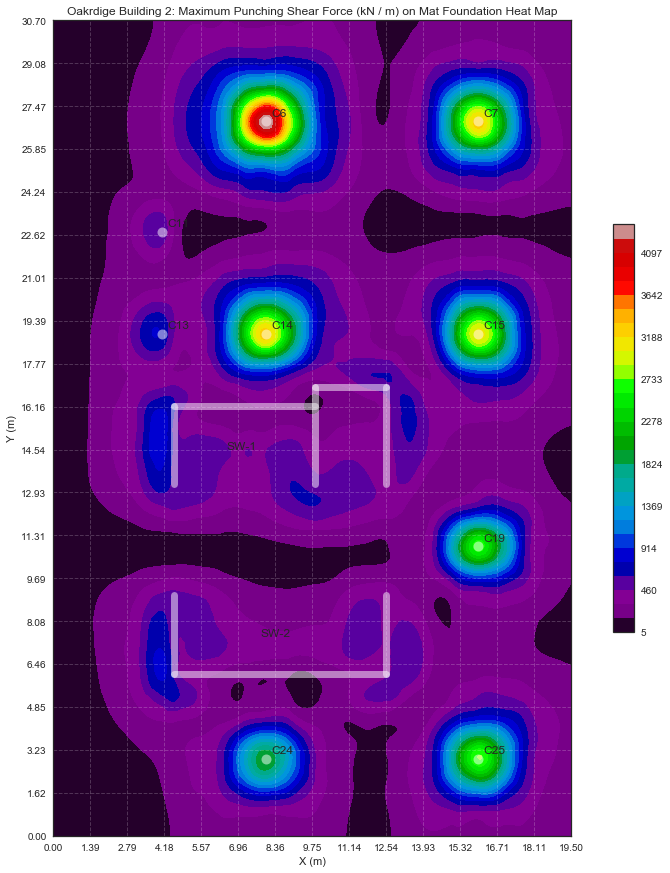

In [16]:
plot_contour_map(file_name='ShellForcesCLEAN-1500mm.xlsx',
                stress_name = 'VMax',
                level = [5, 4400, 30],
                color = 'nipy_spectral',
                title = 'Oakrdige Building 2: Maximum Punching Shear Force (kN / m) on Mat Foundation Heat Map',
                fsize = [15,15])

In [1]:
def plot_contour_map(file_name, stress_name, level, color, title, fsize): 
    '''
    file_name: name of dataframe to use
    stress_name: name of stresses or forces to by analyzed
    level = level or range of stresses and its interval. List.
    color = color or contour map for cmap. e.g. plt.cm.Spectral.
    title = title of chart. String.
    fzise = figure size. List
    '''
    # import statements
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.tri as tri
    import pandas as pd
    import matplotlib.lines as lines
    %matplotlib inline
    
    # reading data from excel and converting it to pandas dataframe
    df = pd.read_excel(file_name, index_col='Joint')

    sns.set(style="white")

    # mesh values
    x = df['GlobalX (mm)']/1000
    y = df['GlobalY (mm)']/1000
    z = df[stress_name]

    # making figure to plot on
    fig = plt.figure(figsize=fsize)
    ax = fig.add_subplot(111)

    # plotting columns
    plt.plot(8, 26.9, marker='o', markersize=10, color="white", zorder = 15, label ='C6', alpha = 0.5)
    plt.plot(16, 26.9, marker='o', markersize=10, color="white", zorder = 15, label ='C7', alpha = 0.5)
    plt.plot(4.1, 22.75, marker='o', markersize=10, color="white", zorder = 15, label ='C11', alpha = 0.5)
    plt.plot(4.1, 18.9, marker='o', markersize=10, color="white", zorder = 15, label ='C13', alpha = 0.5)
    plt.plot(8, 18.9, marker='o', markersize=10, color="white", zorder = 15, label ='C14', alpha = 0.5)
    plt.plot(16, 18.9, marker='o', markersize=10, color="white", zorder = 15, label ='C15', alpha = 0.5)
    plt.plot(16, 10.9, marker='o', markersize=10, color="white", zorder = 15, label ='C19', alpha = 0.5)
    plt.plot(8, 2.9, marker='o', markersize=10, color="white", zorder = 15, label ='C24', alpha = 0.5)
    plt.plot(16, 2.9, marker='o', markersize=10, color="white", zorder = 15, label ='C25', alpha = 0.5)

    # annotating columns
    n = ['C6','C7', 'C11', 'C13', 'C14', 'C15', 'C19', 'C24', 'C25']
    a = [8,16,4.1,4.1,8,16,16,8,16]
    b = [26.9,26.9,22.75,18.9,18.9,18.9,10.9,2.9,2.9]
    for i, txt in enumerate(n):
        ax.annotate(txt, (a[i]+0.2, b[i]+0.2))
        
    # plotting Shearwall SW-1 as lines
    line1 = lines.Line2D([4.552,4.552],[13.24,16.19], linewidth=7, color='white', alpha = 0.5)
    line2 = lines.Line2D([4.552,9.852],[16.19,16.19], linewidth=7, color='white', alpha = 0.5)
    line3 = lines.Line2D([9.852,9.852],[13.24,16.90], linewidth=7, color='white', alpha = 0.5)
    line4 = lines.Line2D([12.502,12.502],[13.24,16.90], linewidth=7, color='white', alpha = 0.5)
    line5 = lines.Line2D([9.852,12.502],[16.90,16.90], linewidth=7, color='white', alpha = 0.5)
    ax.add_line(line1)
    ax.add_line(line2)
    ax.add_line(line3)
    ax.add_line(line4)
    ax.add_line(line5)
    ax.annotate('SW-1', (6.5,14.54))
    
    # plotting Shearwall SW-2 as lines
    line6 = lines.Line2D([4.552,4.552],[6.11,9.06], linewidth=7, color='white', alpha = 0.5)
    line7 = lines.Line2D([12.502,12.502],[6.11,9.06], linewidth=7, color='white', alpha = 0.5)
    line8 = lines.Line2D([4.552,12.502],[6.11,6.11], linewidth=7, color='white', alpha = 0.5)
    ax.add_line(line6)
    ax.add_line(line7)
    ax.add_line(line8)
    ax.annotate('SW-2', (7.8,7.5))

    # making plot mesh and interpolation of x,y and z values for contour map
    nptsx, nptsy = len(x), len(y)
    xg, yg = np.meshgrid(np.linspace(x.min(), x.max(), nptsx),
                         np.linspace(y.min(), y.max(), nptsy))

    triangles = tri.Triangulation(x, y)
    tri_interp = tri.CubicTriInterpolator(triangles, z)
    zg = tri_interp(xg, yg)

    # change levels here according to your data
    levels = np.linspace(level[0], level[1], level[2])
    colormap = ax.contourf(xg, yg, zg, levels,
                           cmap=color,
                           norm=plt.Normalize(vmax=z.max(), vmin=z.min()),
                           zorder = 0)

    # add a colorbar
    fig.colorbar(colormap,
                 orientation='vertical',  # horizontal colour bar
                 shrink=0.50)

    # making gridlines
    plt.xticks(np.linspace(x.min(),x.max(),15))
    plt.yticks(np.linspace(y.min(),y.max(),20))
    ax.xaxis.grid(True, zorder=10, linestyle = '--', color = 'white', alpha = 0.2)
    ax.yaxis.grid(True, zorder=10, linestyle = '--', color = 'white', alpha = 0.2)
    ax.set_aspect("equal", "box")
    
    # plot title and label
    plt.title(title)
    plt.xlabel('X (m)')
    plt.ylabel('Y (m)')

    # show plot
    plt.show()

In [2]:
def design_steel_rein(Mu, b, d, db, layers, cover):
    '''
    Design the steel reinforment based on Moment
    Mu = Factored moment (kN*m)
    b = base (mm)
    d = depth (mm)
    db = bar diameter (mm)
    cover = concrete cover (mm)
    '''
    d = d - cover
    fy = 414
    fc = 35
    m = fy / 0.85 / fc
    Ru = Mu * 10**6 / 0.9 / b / d**2
    p = 1/m * (1-(1-2*Ru*m/fy)**0.5)
    pmin = min((0.25 * (fc)**0.5 / fy),(1.4/fy))
    
    if p > pmin:
        usep = p
    elif p < pmin:
        usep = min(4/3*p, pmin)
        usep = max(usep, 0.002)
    else:
        usep = pmin
        
    As = usep * b * d
    Ab = 3.14159*db**2/4 * layers
    spacing = (b - 2*cover-(As/Ab)*db)/(db-1)
    
    print('p: {0}'.format(p))
    print('pmin: {0: 0.4f}'.format(pmin))
    print('4/3*p: {0: 0.4f}'.format(4/3*p))
    print('usep: {0: 0.4f}'.format(usep))
    print('Moment: {0: 0.2f}, no of bars:{1: 0.0f} using {2: 0.0f} mm rebar {3} layers'.format(Mu, As/Ab, db, layers))
    print('spacing: {0: 0.0f} mm'.format(spacing))
    
    return 
    